In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Libraries & Data

In [1]:
import pandas as pd
fish = pd.read_csv('../input/chaldalcom-groceries-dataset/chaldal-fish.csv');
fruits = pd.read_csv('../input/chaldalcom-groceries-dataset/chaldal-fruits.csv');
meat = pd.read_csv('../input/chaldalcom-groceries-dataset/chaldal-meat.csv');
veg = pd.read_csv('../input/chaldalcom-groceries-dataset/chaldal-vegetable.csv')

In [2]:
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression ;
from sklearn.linear_model import Ridge, Lasso;
from sklearn.metrics import mean_squared_error;
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.svm import SVR;
from sklearn.svm import SVC;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.ensemble import RandomForestRegressor;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.naive_bayes import GaussianNB;
import pickle;



# Fish

Let us look at our data

In [3]:
fish.head()

,Product,Quantity,Price,Category
0,Shrimp Bagda (12-18 pcs),500 gm,৳ 419,Fish
1,Shrimp Horina (30 - 40 pcs),500 gm,৳ 299,Fish
2,Telapia Fish 3/4 pcs (Net Weight After Cutting...,500 gm,৳ 119,Fish
3,Koi Fish 10/12 pcs (After Cutting Net Weight ±...,1 kg,৳ 239,Fish
4,Baila Fish,500 gm,৳ 375,Fish


People are buying fish according to their need as well as ability. We can visualize, in what qantities people are buying most and least

<Figure size 1440x720 with 0 Axes>

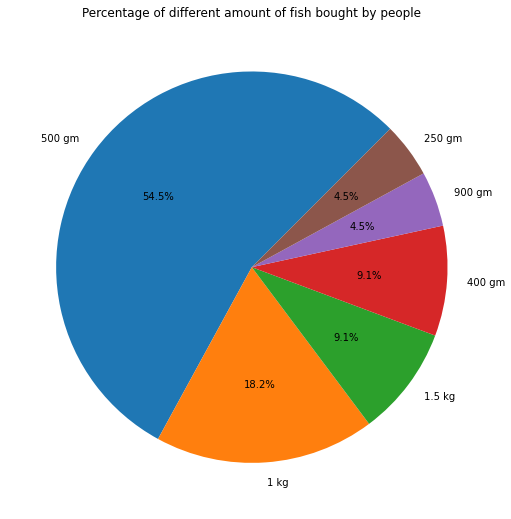

In [33]:
plt.figure(figsize = (20,10))
plt.figure(figsize = (16,9))
Quantity = fish['Quantity'].value_counts().reset_index()
plt.pie(Quantity['Quantity'], labels = Quantity['index'],autopct='%1.1f%%', startangle=45)
plt.title("Percentage of different amount of fish bought by people")
plt.show()

Here we can see, most fish are bought in 500 gms of quantity. If we have to pick the second best value in terms of quantity, it would be 1kg benchmark. So, we can take this range as standard. (500gm - 1kg). Around 70% people are buying fish of that quantity.

As for the least values, they lie in the range of just below that 500 gm benchmark and 1 kg benchmark.

In our data file, price value is not really for visualization. We have to preprocess it first

In [4]:
fish['Price'] = fish['Price'].replace({'৳':''}, regex = True)


In [5]:
fish['Price'] = fish['Price'].replace({'1,': '1'}, regex = True)

In [6]:
fish['Price'] = fish['Price'].astype('int32')

In [7]:
fish.head(16)

,Product,Quantity,Price,Category
0,Shrimp Bagda (12-18 pcs),500 gm,419,Fish
1,Shrimp Horina (30 - 40 pcs),500 gm,299,Fish
2,Telapia Fish 3/4 pcs (Net Weight After Cutting...,500 gm,119,Fish
3,Koi Fish 10/12 pcs (After Cutting Net Weight ±...,1 kg,239,Fish
4,Baila Fish,500 gm,375,Fish
5,Shrimp Golda (10-15 pcs),500 gm,379,Fish
6,Deshi Pangas (Net Weight ±50 gm),1.5 kg,219,Fish
7,Rui Fish Steak Family Cut (Net Weight ± 50 Gm),1 kg,449,Fish
8,Rui Fish Steak Chinese Cut (Net Weight ± 50 Gm),1.5 kg,699,Fish
9,Deshi Mola Fish,250 gm,99,Fish


Now its perfect

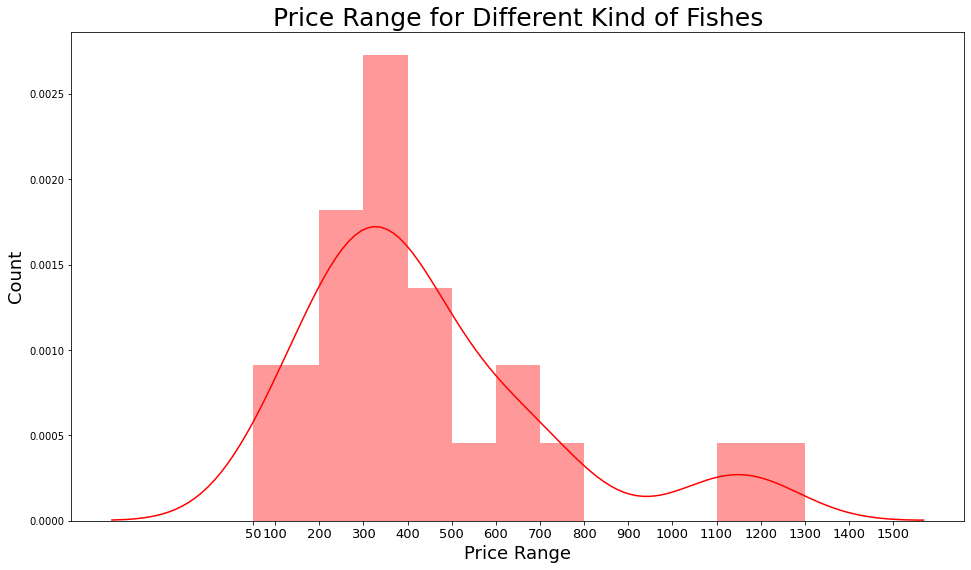

In [61]:
plt.figure(figsize = (16,9))
b = [ 50, 100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500];
sns.distplot( fish['Price'],  bins = b, color = 'R',)
plt.xticks(b, fontsize = 13)
plt.title("Price Range for Different Kind of Fishes", fontsize = 25)
plt.xlabel("Price Range", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

plt.show()

Nice. We have our maximum values in (200taka - 500taka) range. So, people are mostly spending that amount of money to buy fish.
As for the second best is concerned, it lies in (50taka-200taka) and (600taka - 700taka) range. Which is also located in the circumference of our standard (200taka -500taka) range. 
And, one more interesting insight. Very less amount are spend to buy fish at (1000taka+) range. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:346: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  ax.fill_between(x, 0, y, **shade_kws)


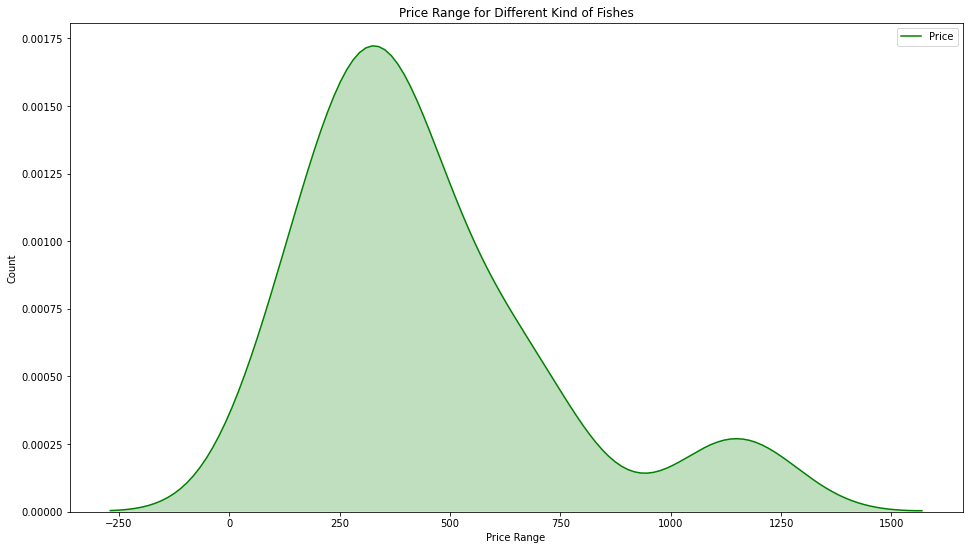

In [13]:
plt.figure(figsize = (16,9))
sns.kdeplot(data= fish['Price'], shade = True, color = 'G')
plt.title("Price Range for Different Kind of Fishes")
plt.xlabel("Price Range")
plt.ylabel("Count")

plt.show()

yeah. This graph also tells us the same story. The standard range of money spent for fish is (200taka - 500taka)

# Fruits

In [15]:
fruits.head()

,Product,Quantity,Price,Category
0,Malta (Net Weight ± 50 gm),2 kg,৳ 400,Fruit
1,Banana Chompa,12 pcs,৳ 59,Fruit
2,Malta (Net Weight ± 50 gm),1 kg,৳ 200,Fruit
3,Guava Thai (Net Weight ± 50 gm),1 kg,৳ 79,Fruit
4,Pineapple,each,৳ 59,Fruit


In [30]:
fruits['Category'].unique()

array(['Fruit'], dtype=object)

In [16]:
fruits['Quantity'].unique()

array(['2 kg', '12 pcs', '1 kg', 'each', '250 gm', '700 gm', '500 gm'],
      dtype=object)

Let us visualize, in what quantity people are buying fruits

<Figure size 1440x720 with 0 Axes>

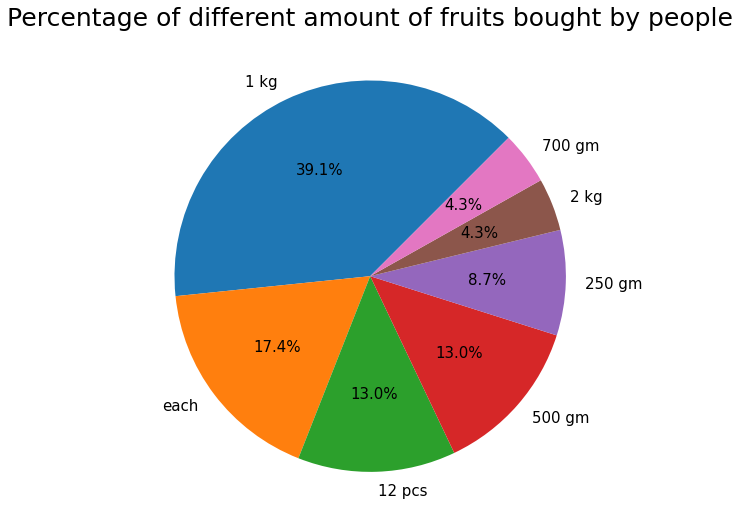

In [95]:
plt.figure(figsize = (20,10))
plt.figure(figsize = (16,9));
textprops = {'fontsize': 15}
Quantity = fruits['Quantity'].value_counts().reset_index()
plt.pie(Quantity['Quantity'], labels = Quantity['index'],autopct='%1.1f%%', startangle=45, textprops = textprops)
plt.title("Percentage of different amount of fruits bought by people", fontsize = 25)
plt.show()

So, people are mostly buying 1kg fruit. But, the second and third best values are surprising. Unlike fish, People are not always buying fruits in kgs

So,  Not every fruit is being sold kgs. Some are also sold in dozens. Moreover, some fruits are sold per piece. Lets figure out which are those fruits

In [21]:
Fruits_sold_per_piece = fruits.loc[fruits['Quantity'] == 'each']

In [94]:
Fruits_sold_per_piece['Product']

4                  Pineapple
5       Green Coconut (Daab)
9     Pomelo Fruit (Jambura)
17                   Coconut
Name: Product, dtype: object

Pineapple, Coconut and Pomelo fruit are sold per piece. Pomelo Fruit is called Jambura in Bengali

In [25]:
Fruits_sold_per_12_piece = fruits.loc[fruits['Quantity'] == '12 pcs'];
Fruits_sold_per_12_piece.head()

,Product,Quantity,Price,Category
1,Banana Chompa,12 pcs,৳ 59,Fruit
8,Banana Sagor,12 pcs,৳ 119,Fruit
16,Banana Sobri,12 pcs,৳ 119,Fruit


Nice. As expected I would say. Banana is sold in dozens. 

Just like the price data from fish, we have to preprocess fruit price data as well for visualization. 

In [26]:
fruits['Price'] = fruits['Price'].replace({'৳':''}, regex = True)
fruits['Price'] = fruits['Price'].astype('int32')

Now we can plot them

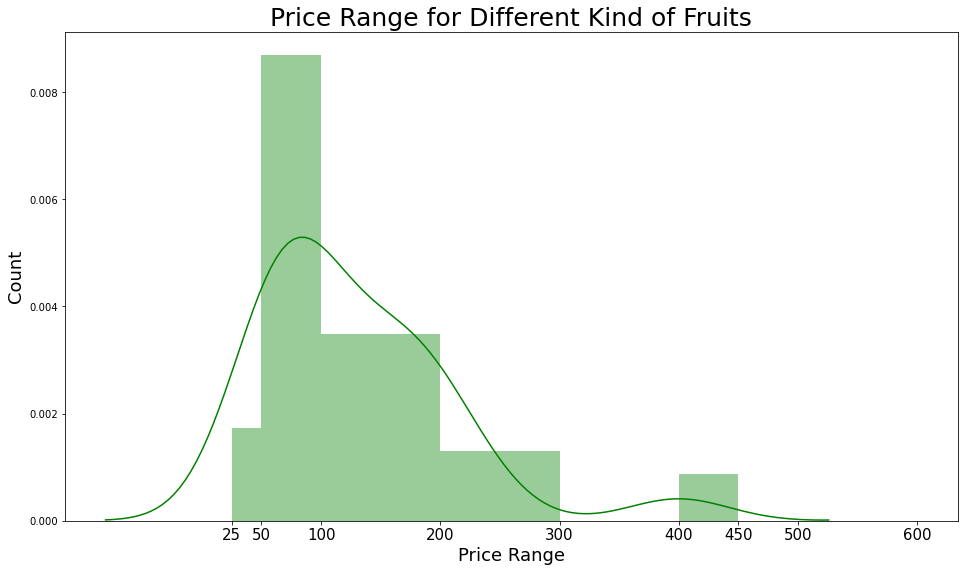

In [60]:
plt.figure(figsize = (16,9))
b = [25, 50, 100,200,300,400,450,500,600];
sns.distplot( fruits['Price'],  bins = b, color = 'G',)
plt.xticks(b,fontsize = 15)
plt.title("Price Range for Different Kind of Fruits", fontsize = 25)
plt.xlabel("Price Range", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

plt.show()

So, most fruit are bought in the price range of (50taka -100taka). We can take it as a standard value. Because it seems to be a clear winner in terms of percentage.
As for the second best value is concerned, it lies between (100taka - 200taka)

#  Meat

In [31]:
meat.head()

,Product,Quantity,Price,Category
0,Broiler Chicken Skin Off (Net Weight ± 50 gm),1 kg,৳ 219,Meat
1,Cock Chicken Skin Off (Net Weight ± 30 gm),500 gm,৳ 229,Meat
2,Bengal Meat Beef Bone In (Net Weight ± 50 gm),1 kg,৳ 635,Meat
3,Chicken Boneless Breast (Net Weight ± 50 gm),1 kg,৳ 349,Meat
4,Broiler Chicken Skin On (Net Weight ± 50 gm),1 kg,৳ 209,Meat


In [38]:
meat['Category'].unique()

array(['Meat'], dtype=object)

Lets explore in what quantity people are buying meat

<Figure size 1440x720 with 0 Axes>

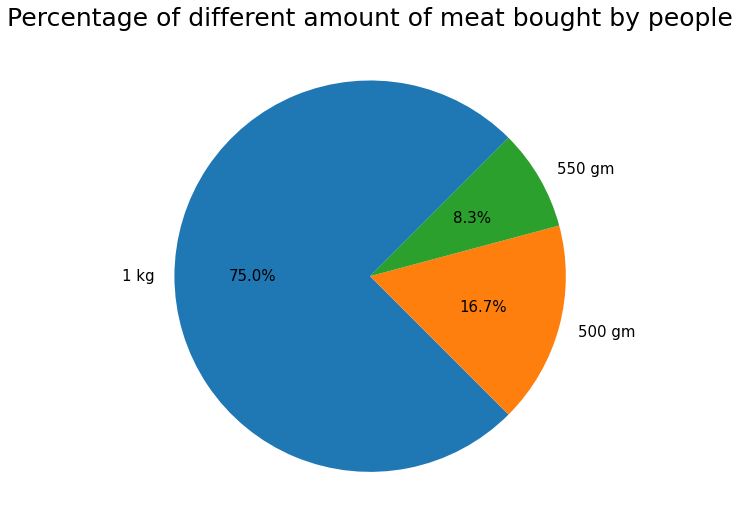

In [76]:
plt.figure(figsize = (20,10))
plt.figure(figsize = (16,9));
textprops = {'fontsize': 15}
Quantity = meat['Quantity'].value_counts().reset_index()
plt.pie(Quantity['Quantity'], labels = Quantity['index'],autopct='%1.1f%%', startangle=45, textprops = textprops)
plt.title("Percentage of different amount of meat bought by people", fontsize = 25)
plt.show()

The standard value is 1kg. Very few people are buying meat in an amount other than that

As usual, lets preprocess the price data for plotting and visualization

In [35]:
meat['Price'] = meat['Price'].replace({'৳':''}, regex = True)
meat['Price'] = meat['Price'].astype('int32')

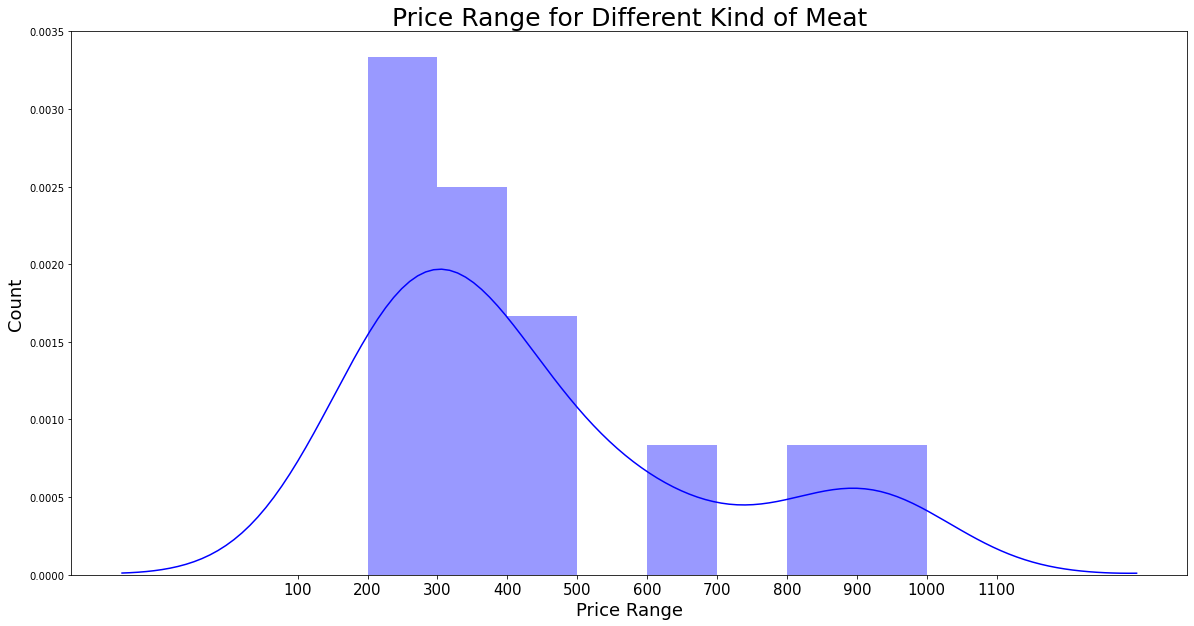

In [59]:
plt.figure(figsize = (20,10))
b = [100,200,300,400,500,600,700,800,900,1000,1100];
sns.distplot( meat['Price'],  bins = b, color = 'B',)
plt.xticks(b, fontsize = 15)
plt.title("Price Range for Different Kind of Meat", fontsize = 25)
plt.xlabel("Price Range", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

plt.show()

The most amount of meat are bought in price range of (200taka -300taka). The second and third highest values lie just in the circumference of that. 
We can take them all as standard. So, the standard amount spent on meat in (200taka - 500taka)

# Vegetable

In [39]:
veg.head()

,Product,Quantity,Price,Category
0,Onion Red (Imported),1 kg,৳ 89,Vegetable
1,Onion (TCB Imported),1 kg,৳ 36,Vegetable
2,Potato Regular (Net Weight ± 50 gm),1 kg,৳ 49,Vegetable
3,Onion Yellow (Imported),1 kg,৳ 69,Vegetable
4,Onion (Local),1 kg,৳ 89,Vegetable


In [96]:
veg['Category'].unique()

array(['Vegetable'], dtype=object)

Lets find out in what quantities people are buying vegetables

In [72]:
veg['Quantity'].unique()

array(['1 kg', '500 gm', '250 gm', '4 pcs', '100 gm', '1 bundle',
       '1.4 kg', '800 gm', 'each', '700 gm'], dtype=object)

<Figure size 1440x720 with 0 Axes>

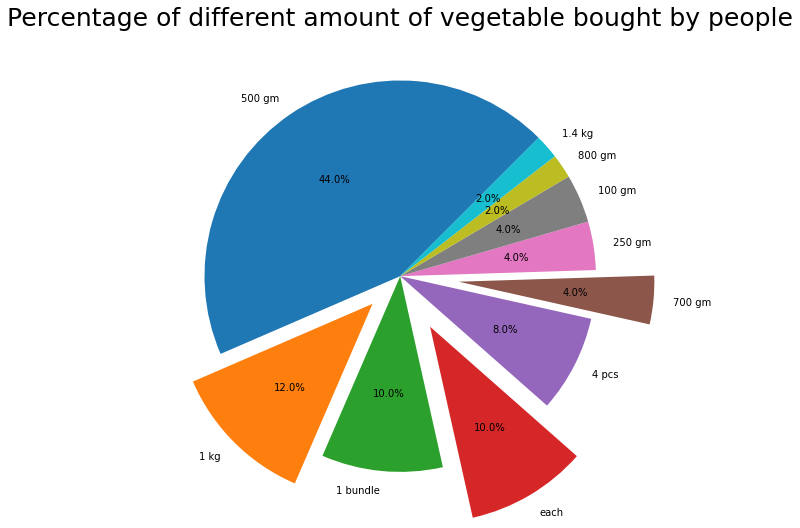

In [82]:
plt.figure(figsize = (20,10))
plt.figure(figsize = (16,9));
explode = [0, 0.2,0,0.3,0,0.3,0,0, 0,0];
Quantity = veg['Quantity'].value_counts().reset_index()
plt.pie(Quantity['Quantity'], labels = Quantity['index'],explode = explode, autopct='%1.1f%%', startangle=45 )
plt.title("Percentage of different amount of vegetable bought by people", fontsize = 25)
plt.show()

Most are bought in 500gms of amount. But a good percentage is also bought in 1kg amount.
We have similarities here as fruit. Some people are buying vegetables in dozens, pieces and 4 pieces. Lets find out which are those

In [86]:
veg_sold_per_piece = veg.loc[veg['Quantity'] == 'each'];
veg_sold_per_piece['Product']

30          Cabbage
33    Water Pumpkin
37            Gourd
44    Sweet Pumpkin
45        Aloe Vera
Name: Product, dtype: object

So, people are buying Cabbage, Gourd, Aloe Vera and different type of Pumkins in pieces. 

In [87]:
veg_sold_per_bundle = veg.loc[veg['Quantity'] == '1 bundle'];
veg_sold_per_bundle['Product']

15                    Red Spinach
22                  Water Spinach
32                    Pui Spinach
36                      Data Shak
49    Pennywort (Thankuni) Leaves
Name: Product, dtype: object

Data shak, Pennywort leaves and different kind of spinach are bought in bundles. 

In [88]:
veg_sold_per_4_piece = veg.loc[veg['Quantity'] == '4 pcs'];
veg_sold_per_4_piece['Product']

11      Long Lemon
20    Kagozi Lemon
29    Banana Green
31     Round Lemon
Name: Product, dtype: object

Different kind of lemons and green bananas(bananas that are not ripe yet) are bought in 4 pieces. In Bangladesh, 4 pieces are called hali.
So, going to shop, one would say "Give me one hali of lemon", which means, 'give me 4 pieces of lemon'

Preprocessing the price data

In [90]:
veg['Price'] = veg['Price'].replace({'৳':''}, regex = True)
veg['Price'] = veg['Price'].astype('int32')

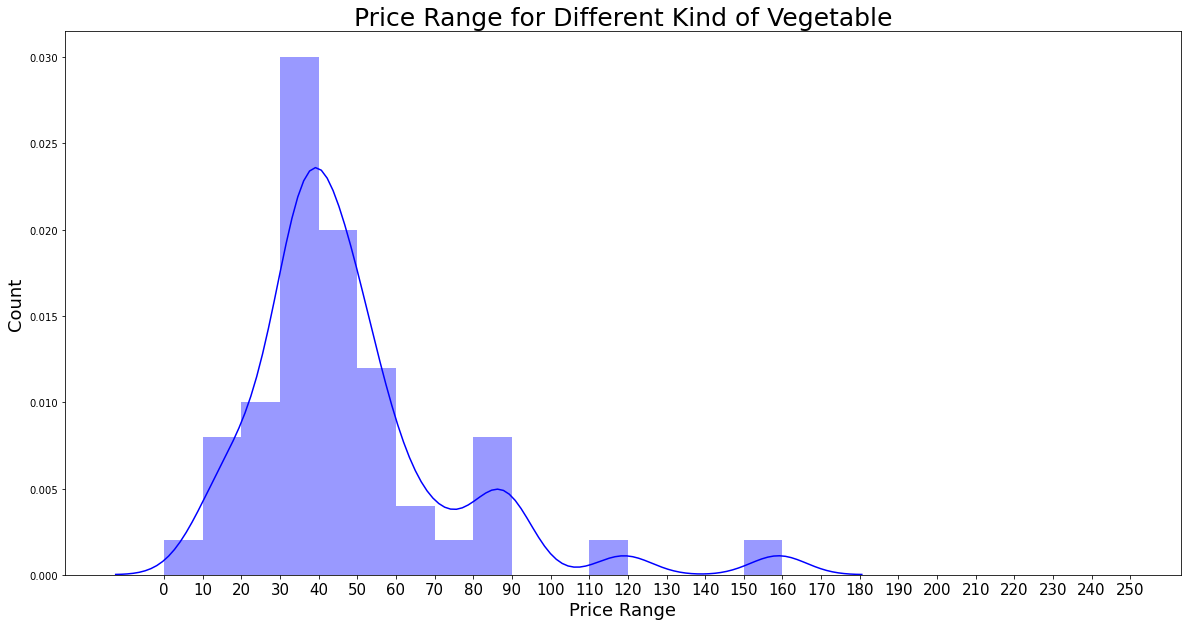

In [93]:
plt.figure(figsize = (20,10))
b = [0,10,20,30,40,50,60,70,80,90,100,110, 120,130,140,150,160,170,180,190,200,210,220,230,240,250];
sns.distplot( veg['Price'],  bins = b, color = 'B',)
plt.xticks(b, fontsize = 15)
plt.title("Price Range for Different Kind of Vegetable", fontsize = 25)
plt.xlabel("Price Range", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

plt.show()

We have here values in a very long range. Most amount of vegetable are bought in (30taka-40taka) range. The second best award goes to (40taka-50taka) range. A good amount is also bought in values around that. We can take the (30taka - 50taka) range as standard. 

But, the ranges (20taka -30taka) and (50taka - 60taka) are mention worthy as well.  

So, thats all I guess. If you have any feedback, let me know